# Proyecto One Piece

**Autor:** José Antonio Parrales de la Cruz

El objetivo de este Notebook es trabajar con los datos del archivo csv que contiene los datos de unos capitulos de una serie llamada One Piece. 

In [1]:
import csv
from datetime import datetime
from collections import namedtuple
from enum import Enum

# 1. Carga de datos
Los datos se encuentran almacenados en un fichero en formato CSV codificado en UTF-8. En este Notebook se va a trabajar con los siguientes tipos de datos:

   **Integer:** Número del capítulo, número de votos del capítulo
   
   **String:** Nombre del capítulo
   
   **Fecha:** Fecha de publicación
   
   **Double:** Nota media
   
   **Enumerado:** Arco argumental
   
Los datos se trabajarán como una lista de tuplas. Las primeras lineas del archivo son:

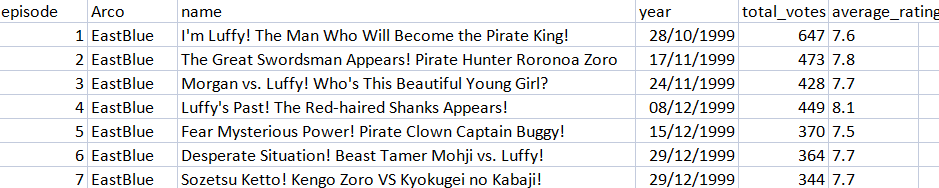

In [2]:
class arcoEnum(Enum):
    EastBlue = 1
    Alabasta = 2
    Skypea = 3
    Water7 = 4
    ThrillerBark = 5
    Marineford = 6
    Gyojin = 7
    Dressrosa = 8
    Zou = 9
    WholeCake = 10
    Reverie = 11
    Wano = 12

In [3]:
Episodio = namedtuple('chapters', 'capitulo, arco, nombre, fecha, votos, nota')

def lee_episodios(fichero):
        with open(fichero, encoding='utf-8') as f:
            lector = csv.reader(f)
            next(lector)
            capitulos = []
            for capitulo, arco, nombre, fecha, votos, nota in lector:
                capitulos.append(Episodio(int(capitulo),arco,str(nombre),datetime.strptime(fecha,'%d/%m/%Y'),int(votos), float(nota)))
        return capitulos

In [4]:
chapters = lee_episodios(r'.\data\One_Piece.csv')
print(chapters[:5])

[chapters(capitulo=1, arco='EastBlue', nombre="I'm Luffy! The Man Who Will Become the Pirate King!", fecha=datetime.datetime(1999, 10, 28, 0, 0), votos=647, nota=7.6), chapters(capitulo=2, arco='EastBlue', nombre='The Great Swordsman Appears! Pirate Hunter Roronoa Zoro', fecha=datetime.datetime(1999, 11, 17, 0, 0), votos=473, nota=7.8), chapters(capitulo=3, arco='EastBlue', nombre="Morgan vs. Luffy! Who's This Beautiful Young Girl?", fecha=datetime.datetime(1999, 11, 24, 0, 0), votos=428, nota=7.7), chapters(capitulo=4, arco='EastBlue', nombre="Luffy's Past! The Red-haired Shanks Appears!", fecha=datetime.datetime(1999, 12, 8, 0, 0), votos=449, nota=8.1), chapters(capitulo=5, arco='EastBlue', nombre='Fear Mysterious Power! Pirate Clown Captain Buggy!', fecha=datetime.datetime(1999, 12, 15, 0, 0), votos=370, nota=7.5)]


# 2. Filtrado y conteo de datos

Continuando con el proyecto, vamos a comenzar a trabajar los datos de la serie. Vamos a comenzar por hacer un filtrado en función del arco. Para eso haremos un filtrado de capítulos en cada arco y comparar la extensión de cada uno, pero como son demasiados capítulos, vamos a almacenar en un diccionario el número de capítulos en lugar de la lista de capítulos.

In [5]:
def filtrado_por_arco(lista, arco):
    
    filtrados= list(filter(lambda x: arco in x, lista))
    
    return filtrados

In [6]:
#probamos la funcion
filtrado_por_arco(chapters, 'Wano')[:5]

[chapters(capitulo=890, arco='Wano', nombre="Marco! The Keeper of Whitebeard's Last Memento!", fecha=datetime.datetime(2016, 2, 13, 0, 0), votos=94, nota=7.2),
 chapters(capitulo=891, arco='Wano', nombre='Climbing Up a Waterfall! A Great Journey Through the Land of ...', fecha=datetime.datetime(2016, 2, 20, 0, 0), votos=161, nota=8.5),
 chapters(capitulo=892, arco='Wano', nombre='Wano Country! To the Land of Dancing Sakura and Samurai', fecha=datetime.datetime(2016, 2, 27, 0, 0), votos=340, nota=9.2),
 chapters(capitulo=893, arco='Wano', nombre="Otama Appears! Luffy vs. Kaido's Army!", fecha=datetime.datetime(2016, 3, 5, 0, 0), votos=171, nota=8.8),
 chapters(capitulo=894, arco='Wano', nombre="He'll Come! The Legend of Ace in the Land of Wano!", fecha=datetime.datetime(2016, 3, 12, 0, 0), votos=172, nota=8.8)]

In [7]:
Arcos= set()
#vamos a ver cuales son los arcos argumentales que hay en la serie
def arcos(lista):
    for episodio in lista:
        Arcos.add(episodio[1])
    return Arcos

In [8]:
arcos(chapters)

{'Alabasta',
 'Dressrosa',
 'EastBlue',
 'Gyojin',
 'Marineford',
 'Reverie',
 'Skypea',
 'ThrillerBark',
 'Wano',
 'Water7',
 'WholeCake',
 'Zou'}

In [9]:
Dic={}
def capitulos_por_arco(lista):
    Dic.clear() #Usamos el clear para poder usar varias veces la funcion y que no se dupliquen los capítulos
    for arco in Arcos:
        Dic[arco] = len(filtrado_por_arco(lista, arco))
#como queremos ver la extension de cada arco, no necesitamos los capitulos, por lo que usamos len para saber cuantos son
    return Dic

In [10]:
capitulos_por_arco(chapters)

{'Skypea': 71,
 'Wano': 69,
 'Zou': 33,
 'Marineford': 131,
 'Water7': 118,
 'Reverie': 12,
 'EastBlue': 61,
 'Gyojin': 59,
 'Dressrosa': 172,
 'WholeCake': 98,
 'Alabasta': 74,
 'ThrillerBark': 60}

# 3. Máximos, ordenación

En este apartado vamos a buscar los capítulos más gustados. Despues, vamos a ordenar los datos en base a ese resultado.

Empezando por el capitulo de más nota, haremos una lista porque es posible que dos capítulos o más tengan la misma nota, por lo que ambos serían los que más nota tienen.

In [11]:
mejorcap = []

def capitulo_mayor_nota(lista):
    mejorcap.clear()
    for elemento in lista:
        '''el primer elemento no se puede comparar a ninguno, por lo que usamos la siguiente instrucción para añadirlo 
        automaticamente a la lista del capítulo más gustado. De esta forma podemos comparar los demas capítulos y en caso
        de que exista un capítulo con mejor nota, se elimine de la lista'''
        if mejorcap == []: 
            mejorcap.append(elemento)
        else:
            if elemento[5] > mejorcap[0][5]:
                mejorcap.clear() 
                mejorcap.append(elemento)
            elif elemento[5] == mejorcap[0][5]:
                mejorcap.append(elemento)
            else:
                continue 
    return mejorcap 


In [12]:
capitulo_mayor_nota(chapters)

[chapters(capitulo=808, arco='WholeCake', nombre='Kanashiki Kettou: Luffy tai Sanji (Kouhen)', fecha=datetime.datetime(2014, 7, 19, 0, 0), votos=571, nota=9.6)]

Tras esto, pasamos a ordenarlos en base a la nota. Sin embargo, Jupyter lo ordena de menor a mayor nota, así que tendremos que invertir ese orden

In [13]:
def ordena_nota_menor(lista):
    ordenados_nota = sorted(lista, key=lambda o: o[5])
    return ordenados_nota

In [14]:
ordena_nota_menor(chapters)[:5]

[chapters(capitulo=748, arco='Zou', nombre='Chika Meikyuu: Luffy tai Torokko Ningen', fecha=datetime.datetime(2013, 5, 25, 0, 0), votos=101, nota=3.8),
 chapters(capitulo=749, arco='Zou', nombre='Kengi Hakunetsu: Law Zoro Tsui ni Kenzan!', fecha=datetime.datetime(2013, 6, 1, 0, 0), votos=96, nota=4.7),
 chapters(capitulo=747, arco='Zou', nombre='Gin no Yousai: Luffy to Barto Daibouken', fecha=datetime.datetime(2013, 5, 18, 0, 0), votos=109, nota=4.9),
 chapters(capitulo=336, arco='ThrillerBark', nombre='Shutsudou Chopperman! Mamore Nagisa no TV-kyoku', fecha=datetime.datetime(2005, 7, 2, 0, 0), votos=133, nota=5.6),
 chapters(capitulo=881, arco='Reverie', nombre='Going into Action! The Implacable New Admiral of the Fleet - ...', fecha=datetime.datetime(2015, 12, 12, 0, 0), votos=120, nota=5.6)]

In [15]:
def ordena_nota_mayor(lista):
    #para invertir el orden, sólo tenemos que añadir reverse=True a la funcion anterior
    ordenados_nota = sorted(lista, reverse=True, key=lambda o: o[5])
    return ordenados_nota

In [16]:
ordena_nota_mayor(chapters)[:5]

[chapters(capitulo=808, arco='WholeCake', nombre='Kanashiki Kettou: Luffy tai Sanji (Kouhen)', fecha=datetime.datetime(2014, 7, 19, 0, 0), votos=571, nota=9.6),
 chapters(capitulo=870, arco='WholeCake', nombre='A Fist of Divine Speed! Another Gear Four Application Activated!', fecha=datetime.datetime(2015, 9, 26, 0, 0), votos=683, nota=9.5),
 chapters(capitulo=483, arco='Marineford', nombre='Kotae o Sagashite: Hiken Ace Senjou ni Shisu', fecha=datetime.datetime(2008, 4, 26, 0, 0), votos=524, nota=9.3),
 chapters(capitulo=485, arco='Marineford', nombre='Kejime o Tsukeru: Shirohige vs Kurohige Kaizokudan', fecha=datetime.datetime(2008, 5, 10, 0, 0), votos=370, nota=9.3),
 chapters(capitulo=377, arco='ThrillerBark', nombre='Nakama no Itami wa Waga Itami: Zoro Kesshi no Tatakai', fecha=datetime.datetime(2006, 4, 15, 0, 0), votos=359, nota=9.2)]

# 4. Trabajando diccionarios
En este apartado vamos a ordenar los capitulos en diccionarios. Empezaremos por los capitulos que se publicaron cada año, siguiendo con las notas medias de los arcos y acabando por los capítulos que estén entre unas notas concretas.

In [17]:
Anyos= set()
#Veamos en que años se publicó la serie
def anyos(lista):
    for episodio in lista:
        Anyos.add(episodio[3].year)
    return Anyos

In [18]:
anyos(chapters)

{1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017}

In [19]:
filtrados2 = []
def filtrado_por_anyo(lista,anyo):
    filtrados2.clear()
    '''A diferencia del filtrado por arco, en este caso si necesitamos la funcion clear para evitar duplicados.
    Esto se debe a que la funcion anterior, mediante el uso de una funcion lambda, podíamos hacer que la lista
    se hiciera siempre desde 0, ya que le atribuiamos un valor mediante el caracter (=). En este caso, como usamos la
    funcion append, es importante asegurarse que la lista estaba vacía ya que los elementos podrian estar varias veces'''
    for capitulo in lista:
        if capitulo[3].year==anyo:
            filtrados2.append(capitulo)
        else:
            continue

    return filtrados2

In [20]:
filtrado_por_anyo(chapters, 1999)

[chapters(capitulo=1, arco='EastBlue', nombre="I'm Luffy! The Man Who Will Become the Pirate King!", fecha=datetime.datetime(1999, 10, 28, 0, 0), votos=647, nota=7.6),
 chapters(capitulo=2, arco='EastBlue', nombre='The Great Swordsman Appears! Pirate Hunter Roronoa Zoro', fecha=datetime.datetime(1999, 11, 17, 0, 0), votos=473, nota=7.8),
 chapters(capitulo=3, arco='EastBlue', nombre="Morgan vs. Luffy! Who's This Beautiful Young Girl?", fecha=datetime.datetime(1999, 11, 24, 0, 0), votos=428, nota=7.7),
 chapters(capitulo=4, arco='EastBlue', nombre="Luffy's Past! The Red-haired Shanks Appears!", fecha=datetime.datetime(1999, 12, 8, 0, 0), votos=449, nota=8.1),
 chapters(capitulo=5, arco='EastBlue', nombre='Fear Mysterious Power! Pirate Clown Captain Buggy!', fecha=datetime.datetime(1999, 12, 15, 0, 0), votos=370, nota=7.5),
 chapters(capitulo=6, arco='EastBlue', nombre='Desperate Situation! Beast Tamer Mohji vs. Luffy!', fecha=datetime.datetime(1999, 12, 29, 0, 0), votos=364, nota=7.7),


In [21]:
DicAnyo={}
def capitulos_por_anyo(lista):
    DicAnyo.clear()
    for anyo in Anyos:
        DicAnyo[anyo] = len(filtrado_por_anyo(lista, anyo))
    return DicAnyo

In [22]:
capitulos_por_anyo(chapters)

{1999: 8,
 2000: 50,
 2001: 95,
 2002: 52,
 2003: 52,
 2004: 52,
 2005: 53,
 2006: 52,
 2007: 52,
 2008: 52,
 2009: 52,
 2010: 52,
 2011: 53,
 2012: 52,
 2013: 52,
 2014: 52,
 2015: 52,
 2016: 53,
 2017: 22}

Para la nota media de los arcos, haremos algo muy similar a lo que hicimos con el diccionario de número de capítulos por arco ya que es necesario el número de capítulos para sacar la nota media, por lo que tomaremos parte de su código. Para no sobrecargar innecesariamente la pantalla, nos quedaremos con 2 decimales usando el comando round

In [23]:
total= 0
MediaDic={}
def media_arco(lista):
    MediaDic.clear()
    for arco in Arcos:
        total=0
        for elemento in filtrado_por_arco(lista, arco):
            total= total+elemento[5]
        MediaDic[arco] = round(total/len(filtrado_por_arco(lista, arco)),2)
    return MediaDic

In [24]:
media_arco(chapters)

{'Skypea': 7.69,
 'Wano': 8.0,
 'Zou': 7.35,
 'Marineford': 7.95,
 'Water7': 7.83,
 'Reverie': 6.98,
 'EastBlue': 7.64,
 'Gyojin': 7.51,
 'Dressrosa': 7.85,
 'WholeCake': 8.04,
 'Alabasta': 7.74,
 'ThrillerBark': 7.58}

Por último, tomaremos unas notas, las cuales marcarán los rangos en los que estarán los capítulos. Por simplificar los valores, tomaremos las medidas de Suspenso(<5), Aprobado(5-6.9), Notable(7-8.9) y Sobresaliente(9-10)

In [25]:
DicSus={} ;Suspensos=[];Aprobados=[];Notables=[];Sobresalientes=[]
def aprov_sus(lista):
    DicSus.clear();Suspensos.clear();Aprobados.clear();Notables.clear();Sobresalientes.clear()
    for elemento in lista:
        if elemento[5]>=0 and elemento[5]<5:
            Suspensos.append(elemento)
        elif elemento[5]>=5 and elemento[5]<=6.9:
            Aprobados.append(elemento)
        elif elemento[5]>=7 and elemento[5]<=8.9:
            Notables.append(elemento)
        elif elemento[5]>=9 and elemento[5]<=10:
             Sobresalientes.append(elemento)
    #como se puede ver, las notas fuera del rango(0-10) no entrarían, ya que seria
    DicSus['Suspensos']=Suspensos;DicSus['Aprobados']=Aprobados;DicSus['Notables']=Notables
    DicSus['Sobresalientes']=Sobresalientes
    return DicSus

In [27]:
aprov_sus(chapters).get('Sobresalientes')

[chapters(capitulo=126, arco='Alabasta', nombre='Koeteiku! Arabasta ni Ame ga Furu!', fecha=datetime.datetime(2001, 6, 16, 0, 0), votos=302, nota=9.0),
 chapters(capitulo=278, arco='Water7', nombre='Ikitai to Ie! Oretachi wa Nakama Da!!', fecha=datetime.datetime(2004, 5, 22, 0, 0), votos=280, nota=9.1),
 chapters(capitulo=309, arco='Water7', nombre='Kobushi ni Kometa Omoi! Luffy Konshin no Gatling', fecha=datetime.datetime(2004, 12, 25, 0, 0), votos=271, nota=9.0),
 chapters(capitulo=312, arco='Water7', nombre='Arigatou Merry! Yuki ni Kemuru Wakare no Umi', fecha=datetime.datetime(2005, 1, 15, 0, 0), votos=273, nota=9.0),
 chapters(capitulo=377, arco='ThrillerBark', nombre='Nakama no Itami wa Waga Itami: Zoro Kesshi no Tatakai', fecha=datetime.datetime(2006, 4, 15, 0, 0), votos=359, nota=9.2),
 chapters(capitulo=405, arco='Marineford', nombre='Kesareta Nakama-tachi: Mugiwara Ichimi Saigo no Hi', fecha=datetime.datetime(2006, 10, 28, 0, 0), votos=358, nota=9.2),
 chapters(capitulo=482, 

# Work in progress... 🛠🛠